### 直接使用tf内部函数

Epoch 1/100
313/313 [==============================] - 1s 1ms/step - loss: 0.4903
Epoch 2/100
313/313 [==============================] - 0s 2ms/step - loss: 0.4457
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4254
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4150
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4130
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4066
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3940
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3853
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3771
Epoch 11/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3677
Epoch 12/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3607
Epoch 13/100


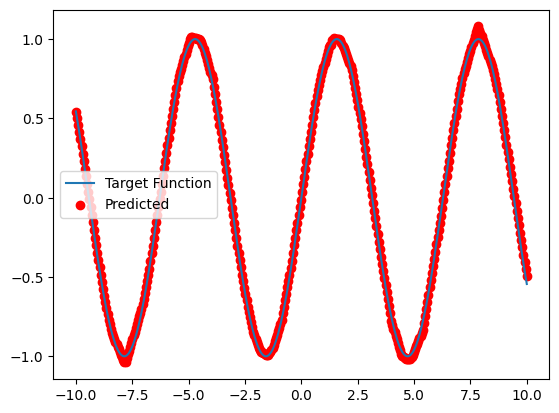

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
def target_function(x):
    return np.sin(x) # 拟合的函数

# 生成数据点
x_train = np.linspace(-20, 20, 10000).reshape(-1, 1)  # x的范围从-10到20
y_train = target_function(x_train)  # 计算目标函数值


# 定义模型
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  # 第一层
    layers.Dense(64, activation='relu'),  # 第二层
    layers.Dense(1)  # 输出层
])

model.compile(optimizer='adam', loss='mse')  # 使用Adam优化器和均方误差损失函数

model.fit(x_train, y_train, epochs=100, batch_size=32)  # 训练模型

# 使用模型进行预测
x_test = np.linspace(-10, 10, 400).reshape(-1, 1)
y_pred = model.predict(x_test)

# 可视化预测结果和目标函数
import matplotlib.pyplot as plt
plt.plot(x_test, target_function(x_test), label='Target Function')
plt.scatter(x_test, y_pred, label='Predicted', color='r')
plt.legend()
plt.show()


### 尝试手写

Epoch 0, Loss: 4.788499706626668
Epoch 1000, Loss: 0.10628499808741182
Epoch 2000, Loss: 0.06642327092107238
Epoch 3000, Loss: 0.03801696575494553
Epoch 4000, Loss: 0.021703350709237484
Epoch 5000, Loss: 0.015101004184901495
Epoch 6000, Loss: 0.01267789245797588
Epoch 7000, Loss: 0.011500350505842338
Epoch 8000, Loss: 0.010812908702055058
Epoch 9000, Loss: 0.010382817843704867


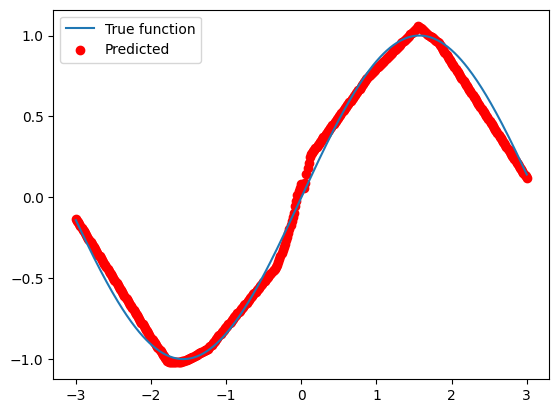

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 函数定义
def target_function(x):
    return np.sin(x)

# 数据生成
x_train = np.linspace(-5, 5, 2000).reshape(-1, 1)
y_train = target_function(x_train)
x_test = np.linspace(-3, 3, 400).reshape(-1, 1)
y_test = target_function(x_test)

# 初始化网络参数
input_size = 1
hidden_size = 64
output_size = 1
np.random.seed(42) # 确保结果可复现
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# ReLU激活函数及其导数
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return z > 0

# 损失函数
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# 前向传播
def forward_pass(x):
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return z2, z1, a1

# 反向传播和训练
learning_rate = 0.001
epochs = 10000
for epoch in range(epochs):
    # 前向传播
    y_pred, z1, a1 = forward_pass(x_train)
    
    # 计算损失
    loss = mse_loss(y_train, y_pred)
    
    # 反向传播
    d_loss_y_pred = 2.0 * (y_pred - y_train) / y_train.size
    d_loss_W2 = a1.T @ d_loss_y_pred
    d_loss_b2 = d_loss_y_pred.sum(axis=0)
    d_loss_a1 = d_loss_y_pred @ W2.T
    d_loss_z1 = d_loss_a1 * relu_deriv(z1)
    d_loss_W1 = x_train.T @ d_loss_z1
    d_loss_b1 = d_loss_z1.sum(axis=0)
    
    # 参数更新
    W1 -= learning_rate * d_loss_W1
    b1 -= learning_rate * d_loss_b1
    W2 -= learning_rate * d_loss_W2
    b2 -= learning_rate * d_loss_b2
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# 评估
y_pred_test, _, _ = forward_pass(x_test)
plt.plot(x_test, y_test, label='True function')
plt.scatter(x_test, y_pred_test, color='r', label='Predicted')
plt.legend()
plt.show()
